# TSF - Task2 - To Explore Supervised Machine Learning

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Data can be found at http://bit.ly/w-data

#### What will be predicted score if a student study for 9.25 hrs in a day?

## Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing data

In [3]:
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Checking datatypes

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

## Pulling the Information from the given data

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking for missing or null values

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Checking for corelation between 2 variables

In [7]:
corr= data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


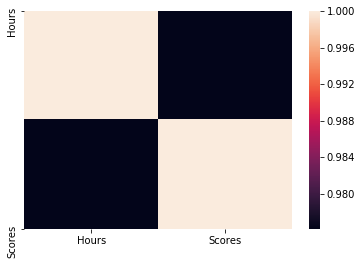

In [8]:
sns.heatmap(corr)

## Plotting data

Text(0, 0.5, ' Percentage score')

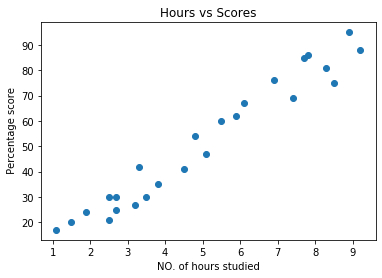

In [9]:
x= data['Hours']
y= data['Scores']
plt.scatter(x,y)
plt.title("Hours vs Scores")
plt.xlabel("NO. of hours studied")
plt.ylabel(" Percentage score")

## Preparing the data

In [10]:
x= data[["Hours"]].values
y= data[["Scores"]].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Training our data using Linear regression model 

In [12]:
from sklearn.linear_model import LinearRegression
training = LinearRegression()
training.fit(x_train, y_train)
print("Training complete!")

Training complete!


## Plotting the Regression line

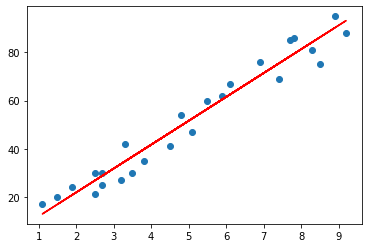

In [13]:
line= training.coef_*x+training.intercept_
plt.scatter(x,y)
plt.plot(x,line, c='red');
plt.show()

## Making predictions

In [14]:
print("Training score")
print(training.score(x_train, y_train))
print("Test score")
print(training.score(x_test, y_test))

Training score
0.9515510725211553
Test score
0.9454906892105356


In [15]:
y_pred = training.predict(x_test)

In [16]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

## Final answer

#### What will be predicted score if a student study for 9.25 hrs in a day?

In [17]:
hrs = 9.25
own_pred = training.predict([[hrs]])
print("No of Hours studied :", format(hrs))
print("Predicted score :",format(own_pred[0]))

No of Hours studied : 9.25
Predicted score : [93.69173249]


## Evaluation of model accuracy

In [18]:
# Finding error rate
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test, y_pred))
print("MSE :",metrics.mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 4.183859899002975
MSE : 21.5987693072174
RMSE : 4.6474476121003665


### Comparing using graphs

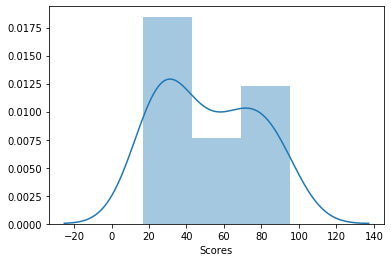

In [19]:
sns.distplot(data['Scores'])

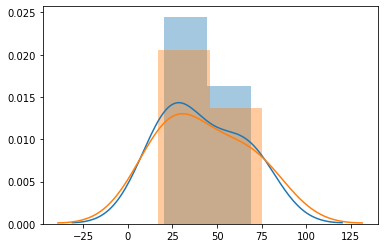

In [20]:
sns.distplot([y_test])
sns.distplot([y_pred])